In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

## I Wayan Rangga Rijasa - 0706022210019

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [90]:
# load dataset and show the first five sample
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv')
df.head(n=5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [91]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={
    'Annual Income (k$)': 'AnnualIncome',
    'Spending Score (1-100)': 'SpendingScore'
})
df.head(n=5)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [92]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [93]:
# Check for null values in the dataset
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

Text(0, 0.5, 'Spending Score (1-100)')

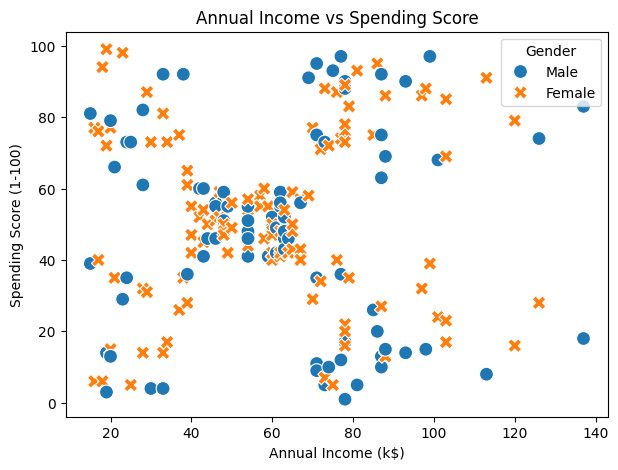

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# make an insightful visualization and explain
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Gender', style='Gender', s=100)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

## Data Preprocessing

For this case study, we only use income and spending score

In [95]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# create new dataframe that consist only annual income and spending score
df_income_spending = df[['AnnualIncome', 'SpendingScore']]
df_income_spending.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [96]:
# scale dataset with standard scaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_income_spending)

df_scaled = pd.DataFrame(scaled_data, columns=['AnnualIncome', 'SpendingScore'])
df_scaled.head()

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [97]:
# get stastical information on the new dataset
df_scaled.describe()

,AnnualIncome,SpendingScore
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

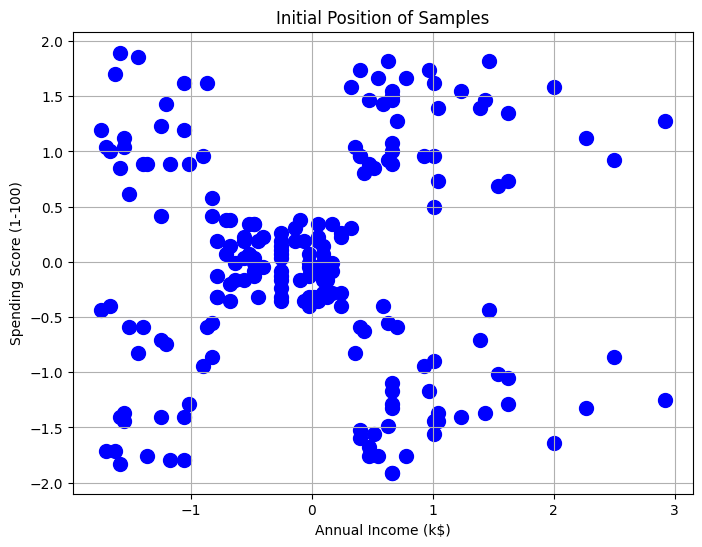

In [98]:
# Visualize the position

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['AnnualIncome'], df_scaled['SpendingScore'], color='blue', s=100)
plt.title("Initial Position of Samples")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()

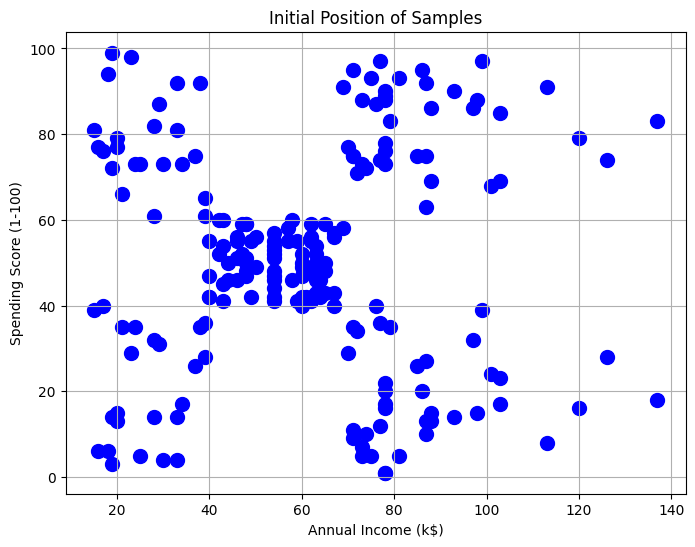

In [99]:
# Visualize the position using the original scale
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.scatter(df_income_spending['AnnualIncome'], df_income_spending['SpendingScore'], color='blue', s=100)
plt.title("Initial Position of Samples")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [100]:
# set the parameter for evaluating K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Text(0, 0.5, 'SSE')

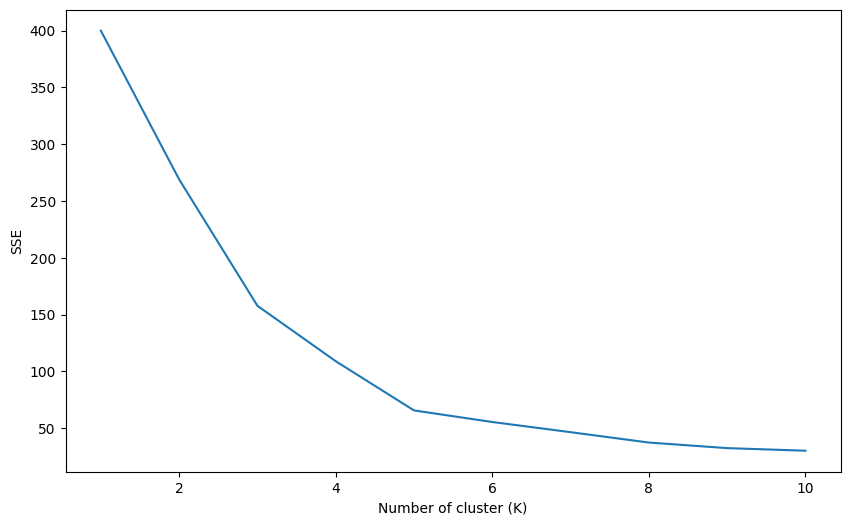

In [101]:
# manually visualize the elbow method using plotlib
plt.figure(figsize=(10, 6))
plt.plot(range(1,11), inertia)
plt.xlabel('Number of cluster (K)')
plt.ylabel('SSE')

In [102]:
# using kneelocator to find the elbow/knee
knee = KneeLocator(K_range, inertia, curve='convex', direction='decreasing')
optimal_k = knee.elbow
print(f"BEST number of clusters (K) found: {optimal_k}")

BEST number of clusters (K) found: 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [103]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
y_pred

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

Visualize your result based on income and spending. You also can show the final position of the centroid.

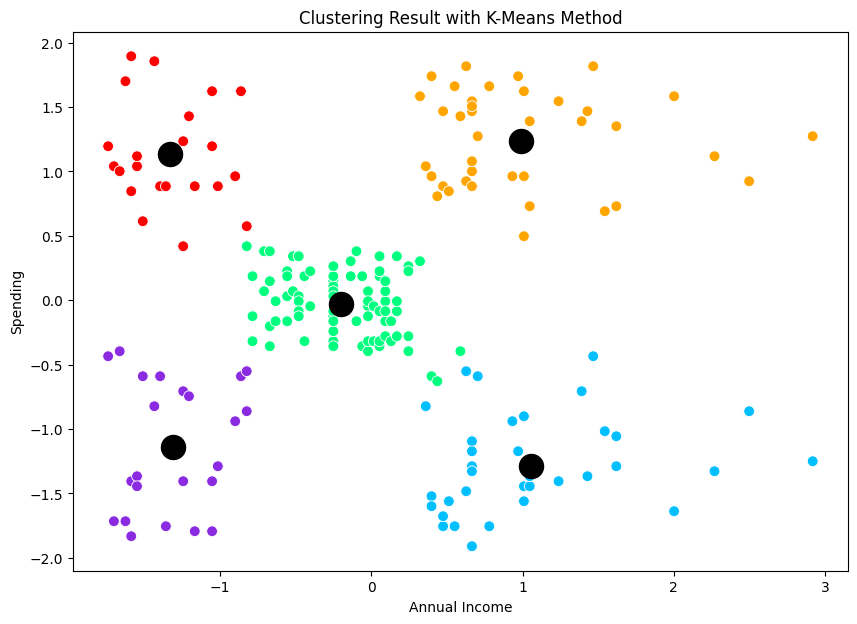


Cluster 0 - Budget-Conscious or Unengaged Customers
Interpretation: Customers in this cluster may be budget-conscious or not particularly engaged. Encouraging engagement through budget-friendly product lines or discounts may increase spending.

Cluster 1 - Engaged Low-Income Customers
Interpretation: Despite lower incomes, these customers have high spending scores, indicating strong engagement. Frequent promotions or loyalty rewards may help maintain or increase their spending level.

Cluster 2 - Wealthy but Unengaged Customers
Interpretation: Customers in this cluster have higher incomes but low spending scores, suggesting limited engagement. Tailored marketing and premium products could encourage higher spending.

Cluster 3 - High-Value Customers
Interpretation: These customers are highly engaged and have high incomes. VIP programs and personalized offers can help retain their loyalty and increase spending.

Cluster 4 - Average Engagement and Income
Interpretation: These customers e

In [104]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))

sns.scatterplot(x="AnnualIncome", y="SpendingScore", hue=y_pred, palette=["blueviolet",
                                             "red",
                                             "deepskyblue",
                                             "orange",
                                             "springgreen"],
                               legend=None, data=df_scaled, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Annual Income")
plt.ylabel("Spending")
plt.title("Clustering Result with K-Means Method")
plt.show()

print("\nCluster 0 - Budget-Conscious or Unengaged Customers")
print("Interpretation: Customers in this cluster may be budget-conscious or not particularly engaged. Encouraging engagement through budget-friendly product lines or discounts may increase spending.")

print("\nCluster 1 - Engaged Low-Income Customers")
print("Interpretation: Despite lower incomes, these customers have high spending scores, indicating strong engagement. Frequent promotions or loyalty rewards may help maintain or increase their spending level.")

print("\nCluster 2 - Wealthy but Unengaged Customers")
print("Interpretation: Customers in this cluster have higher incomes but low spending scores, suggesting limited engagement. Tailored marketing and premium products could encourage higher spending.")

print("\nCluster 3 - High-Value Customers")
print("Interpretation: These customers are highly engaged and have high incomes. VIP programs and personalized offers can help retain their loyalty and increase spending.")

print("\nCluster 4 - Average Engagement and Income")
print("Interpretation: These customers exhibit average income and spending scores. Strategies to increase their engagement and spending could include upselling techniques, bundling products, or introducing loyalty tiers.")


In [105]:
# Inverse transform the scaled data to get the original values
df_scaled = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=["AnnualIncome","SpendingScore"])
df_scaled.head()

,AnnualIncome,SpendingScore
0,15.0,39.0
1,15.0,81.0
2,16.0,6.0
3,16.0,77.0
4,17.0,40.0


In [106]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster

cluster_summary = df.groupby(y_pred).agg({'SpendingScore': ['mean', 'std', 'min', 'max'],
                                          'AnnualIncome': ['mean', 'std', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

print("Summary of Clustering Analysis")
print("="*30)
print("This clustering analysis divides customers into five distinct segments based on Annual Income and Spending Score. Each cluster represents a unique customer type, enabling targeted strategies for engagement and revenue growth.")

print("To maximize customer engagement and revenue across all clusters, the company should:")
print("- Implement personalized marketing strategies tailored to each cluster's spending habits and income levels.")
print("- Develop loyalty programs to retain customers, particularly in clusters with high engagement or potential for growth.")
print("- Consider introducing tiered offers or products to appeal to both low- and high-income customers.")
print("- Use data-driven insights to create targeted promotions that encourage repeat purchases from budget-conscious and wealthy customers.")
print("- Explore ways to increase customer engagement in low-engagement clusters through surveys, feedback, or premium product offerings.")
print("- Maintain strong relationships with high-value customers through VIP programs, personalized offers, and exclusive experiences.")
print("- Ensure that middle-income and moderate-spending customers receive targeted incentives, such as bundling, upselling, and loyalty rewards.")

Summary of Clustering Analysis
This clustering analysis divides customers into five distinct segments based on Annual Income and Spending Score. Each cluster represents a unique customer type, enabling targeted strategies for engagement and revenue growth.
To maximize customer engagement and revenue across all clusters, the company should:
- Implement personalized marketing strategies tailored to each cluster's spending habits and income levels.
- Develop loyalty programs to retain customers, particularly in clusters with high engagement or potential for growth.
- Consider introducing tiered offers or products to appeal to both low- and high-income customers.
- Use data-driven insights to create targeted promotions that encourage repeat purchases from budget-conscious and wealthy customers.
- Explore ways to increase customer engagement in low-engagement clusters through surveys, feedback, or premium product offerings.
- Maintain strong relationships with high-value customers through V

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

<write here>